In [1]:
from sklearn import datasets
import numpy as np
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from keras.datasets import cifar10
from sklearn.cross_validation import train_test_split
import pickle
import matplotlib.pyplot as plt

Using TensorFlow backend.
/home/itri/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
(X_train , y_train) , (X_test , y_test) = cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
X_test.shape

(10000, 32, 32, 3)

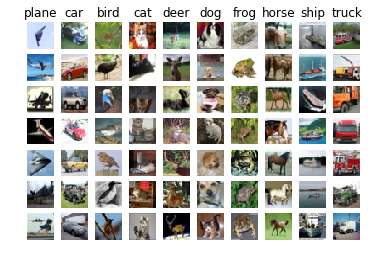

In [6]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [7]:
model = KNeighborsClassifier(n_neighbors=4, weights='distance',algorithm='auto',leaf_size = 30, p=2 )

In [8]:
X_train =np.reshape(X_train, (X_train.shape[0],-1))
X_test =np.reshape(X_test, (X_test.shape[0],-1))


In [14]:
cls = model.fit(X_train,y_train)

/home/itri/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


In [15]:
pred_test = model.predict(X_test)

In [16]:
print(pred_test)

[4 8 8 ... 5 6 4]


In [17]:
score = model.score(X_test,y_test)

In [18]:
from sklearn.model_selection import cross_val_score

In [19]:
cross=cross_val_score(cls,X_train,y_train,cv=5)

/home/itri/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/itri/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/itri/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/itri/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWa

In [20]:
print(cross)

[0.3482 0.3507 0.359  0.348  0.3422]
